In [ ]:
import pandas as pd
import numpy as np

# for data visualization
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import re
import numpy as np
from bs4 import BeautifulSoup
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import lightgbm as lgb
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from collections import Counter
import plotly.express as px

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
email = pd.read_csv('/content/spam.csv')

In [ ]:
# email.isnull().sum() # This line caused the error
email.isnull().sum() # Check for null values in the DataFrame

,0
Category,0
Message,0


In [ ]:
email.duplicated().sum()

np.int64(415)

In [ ]:
email.drop_duplicates(inplace=True)
email.duplicated().sum()

np.int64(0)

In [ ]:
import nltk
nltk.download('punkt_tab')
email['No of Chars'] = email['Message'].str.len()
email['No of Words'] = email['Message'].apply(lambda x: len(word_tokenize(x)))
email['No of Sentences'] = email['Message'].apply(lambda x: len(sent_tokenize(x)))
email.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Category,Message,No of Chars,No of Words,No of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
email[email['Category'] == 'ham'].describe()

,No of Chars,No of Words,No of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
email[email['Category'] == 'spam'].describe()

,No of Chars,No of Words,No of Sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
email['Message'] = email['Message'].apply(lambda x: x.lower())

In [ ]:
def html_tag_remover(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
email['Message'] = email['Message'].apply(lambda x: html_tag_remover(x))

In [ ]:
email['Message'] = email['Message'].str.strip()

In [ ]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[@#%&*^$£!()-_+={}\[\]:;<>,.?\/\\\'"`~]'  # Matches any character that is not alphanumeric or whitespace

    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
email['Message'] = email['Message'].apply(remove_special_characters)

In [ ]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# Function to replace chat words with their full forms
def chat_conversation(text):
    words = text.split()
    for i, w in enumerate(words):
        if w.upper() in chat_words:
            words[i] = chat_words[w.upper()]
        else:
            words[i] = w
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
email['Message'] = email['Message'].apply(chat_conversation)

In [ ]:
# Get English stopwords from NLTK
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
email['Message'] = email['Message'].apply(remove_stopwords)
email.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,No of Chars,No of Words,No of Sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,dun say early hor c already say,49,13,1
4,ham,nah dont think goes usf lives around though,61,15,1


In [ ]:
# Initialize the WordNetLemmatizer
import nltk
nltk.download('wordnet') # Download the wordnet resource
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the text column
email['Message'] = email['Message'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))

# Fit the model and transform the corpus into vectors
X = vectorizer.fit_transform(email['Message']).toarray().astype(float)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Train Test Split

# Define the target variable y
y = email['Category']

#X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
X1 = email['Message']
y1 = email['Category'].apply(lambda x: 1 if x == 'spam' else 0)

maxlength = max([len(x) for x in X1])

def tokenizer_fit(text, OOV_token):
    tokenizer = Tokenizer(oov_token=OOV_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

tokenizer = tokenizer_fit(X1, '<OOV>')

def sequence_padding(sentence, tokenizer,padding, maxlen):
    sequences = tokenizer.texts_to_sequences(sentence)
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlength)
    return padded_sequences

X1 = sequence_padding(X1, tokenizer, 'post', maxlength)

# Splitting the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
word_index = tokenizer.word_index
vocab = len(word_index)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=vocab+1, output_dim=100, input_length=maxlength,input_shape=(maxlength,)))

model.add(Bidirectional(LSTM(50, kernel_regularizer=tf.keras.regularizers.l2(0.03))))

model.add(Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 523, 100)       │       800,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 861,113 (3.28 MB)

 Trainable params: 861,113 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=7, batch_size=8,  callbacks=[early_stopping], validation_split=0.2 )

Epoch 1/7
310/310 ━━━━━━━━━━━━━━━━━━━━ 143s 446ms/step - accuracy: 0.8795 - loss: 3.3770 - val_accuracy: 0.9709 - val_loss: 0.2046
Epoch 2/7
310/310 ━━━━━━━━━━━━━━━━━━━━ 148s 464ms/step - accuracy: 0.9672 - loss: 0.1928 - val_accuracy: 0.9790 - val_loss: 0.1656
Epoch 3/7
310/310 ━━━━━━━━━━━━━━━━━━━━ 199s 456ms/step - accuracy: 0.9875 - loss: 0.1182 - val_accuracy: 0.9822 - val_loss: 0.1326
Epoch 4/7
310/310 ━━━━━━━━━━━━━━━━━━━━ 143s 461ms/step - accuracy: 0.9936 - loss: 0.0821 - val_accuracy: 0.9855 - val_loss: 0.1131
Epoch 5/7
310/310 ━━━━━━━━━━━━━━━━━━━━ 209s 485ms/step - accuracy: 0.9945 - loss: 0.0661 - val_accuracy: 0.9887 - val_loss: 0.1143


In [ ]:
y_pred = np.where(model.predict(X_test)>0.5,1,0)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


In [ ]:
LSTM_accuracy = np.round(accuracy_score(y_test, y_pred), 3)
LSTM_AUC = np.round(roc_auc_score(y_test, y_pred),3)
LSTM_recall = np.round(recall_score(y_test, y_pred),3)
LSTM_f1 = np.round(f1_score(y_test, y_pred),3)
LSTM_precision = np.round(precision_score(y_test, y_pred),3)

print("LSTM_Accuracy : ", LSTM_accuracy,"\n")
print("LSTM_AUC : ",LSTM_AUC,"\n")
print("LSTM_Recall : ",LSTM_recall,"\n")
print("LSTM_F1 : ", LSTM_f1,"\n")
print("LSTM_Precision : ", LSTM_precision,"\n")

LSTM_Accuracy :  0.971 

LSTM_AUC :  0.912 

LSTM_Recall :  0.831 

LSTM_F1 :  0.883 

LSTM_Precision :  0.942 



In [ ]:


# Define the labels and values for the bar chart
labels = ['Accuracy', 'F1-Score', 'Precision']
values = [LSTM_accuracy, LSTM_f1, LSTM_precision]

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(x=labels, y=values)])

# Update the layout of the chart
fig.update_layout(
    title='Model Performance Metrics (LSTM)',
    xaxis_title='Metric',
    yaxis_title='Score',
    yaxis=dict(range=[0, 1]) # Set y-axis range from 0 to 1
)

# Show the plot
fig.show()

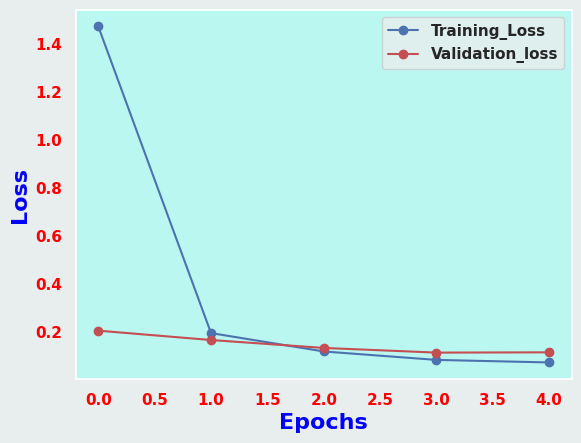

In [ ]:

sns.set_theme(rc={'axes.facecolor':'#baf7f1','figure.facecolor':'#e8eded'})
plt.plot(history.history['loss'], label='Training_Loss', marker='o',color='b')
plt.plot(history.history['val_loss'], label='Validation_loss', marker='o',color='r')
plt.xlabel('Epochs',fontsize=16,fontweight='bold',color='blue')
plt.ylabel('Loss',fontsize=16,fontweight='bold',color='blue')
plt.xticks(color='red',weight='bold')
plt.yticks(color='red',weight='bold')
plt.legend(loc='upper right', prop={'weight':'bold'},facecolor='#e8eded')
plt.grid(False)

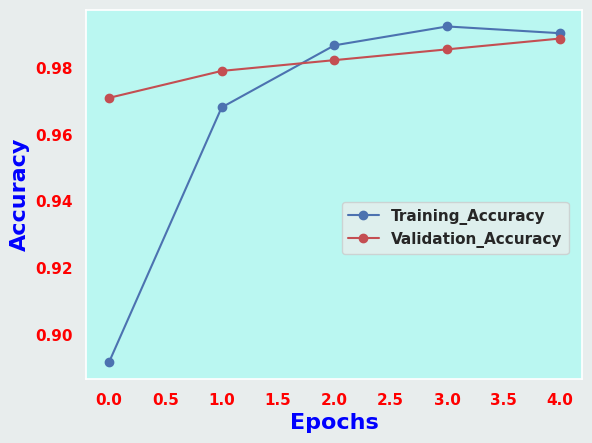

In [ ]:
plt.plot(history.history['accuracy'], label='Training_Accuracy', marker='o',color='b')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy', marker='o',color='r')
plt.xlabel('Epochs',fontsize=16,fontweight='bold',color='blue')
plt.ylabel('Accuracy',fontsize=16,fontweight='bold',color='blue')
plt.xticks(color='red',weight='bold')
plt.yticks(color='red',weight='bold')
plt.legend(bbox_to_anchor=(0.5,0.5), prop={'weight':'bold'},facecolor='#e8eded')
plt.grid(False)

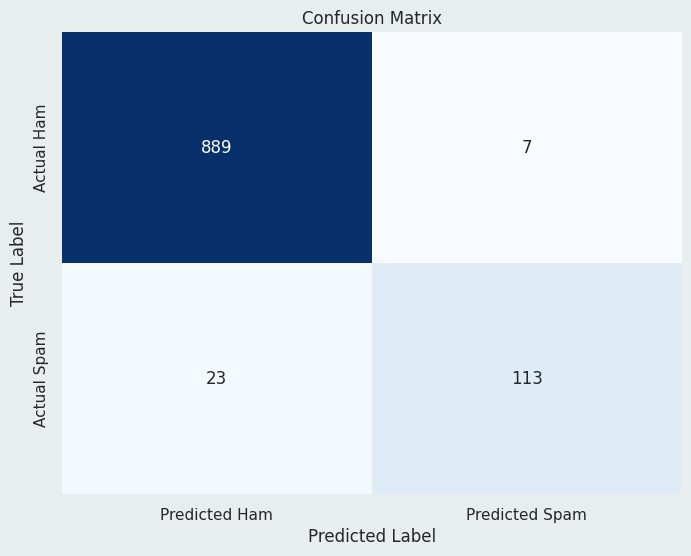

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: اكتب خلية لادخال بيانات وفحصها

# Cell for user input and prediction
input_message = input("Enter a message to predict")

# Preprocess the input message using the same steps as the training data
processed_input = html_tag_remover(input_message.lower())
processed_input = remove_special_characters(processed_input)
processed_input = chat_conversation(processed_input)
processed_input = remove_stopwords(processed_input)
processed_input = lemmatize_text(processed_input)

# Convert the processed input to sequences using the trained tokenizer
input_sequence = sequence_padding([processed_input], tokenizer, 'post', maxlength)

# Make the prediction using the trained model
prediction = model.predict(input_sequence)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("(spam).")
else:
    print("(ham).")

Enter a message to predictSubject: i was on your xango web site  hello xango distributor ,  my name is jonathan roberts and i represent peak impact lead generation  systems . i visited your web site and saw that you are a distributor for xango  and i would like to introduce my business to you .  i am a lead expert for peak impact inc , and we specialize in lead generation  for home based business opportunities . we generate real time national , local  area code , and gender based leads . we also specialize in custom marketing  campaigns as well . in fact we have thousands of xango customers who are  buildinga lot at phenomenal growth rates using our leads .  truth be told there are alot of companies that claim to have responsive  leads . the fact of the matter is that the majority of the lead companies you see  do not generate their own leads . they are resellers that resell the same call  list up to six times or more . we at peak impact are lead generators and we  generate the very be